<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/fullNoteBooks/IntroModeling1_LinearReg_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1L4qAFCwXR9S6RHVzdOc7PhL7-B3yW-Jb' width="300" align = 'left'>  

#<font color='lightblue'>Linear regression</font>

In previous classes we have used exploritory approaches to visualize and quantify relationships between variables. Now we will use linear regression to start to build models that can make predictions based on these relationships. 

Import the needed libraries

In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm #for running regression!
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### <font color='lightblue'>Load the data</font>

Download the 'bostonHouses.csv' from the class's [shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing) and load it into a dataframe.
> Note: one way to get the data in, is just to drag and drop the csv file into the files tab on the left. However, using this method means that when we leave our session the data will be removed (i.e., it isn't on your gdrive).

In [2]:
df_boston = pd.read_csv('/content/bostonHouses.csv')

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Q: What kinds of data do you have?


In [3]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

Q: Are there missing values anywhere?

In [4]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### <font color='lightblue'>Visualize and Explore</font>

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Plot the house prices on the y-axis, with some other variables on the x-axis.
> Generally the value we are trying to predict is called the response variable, while the values we are using to make those predictions are the predictor variables.

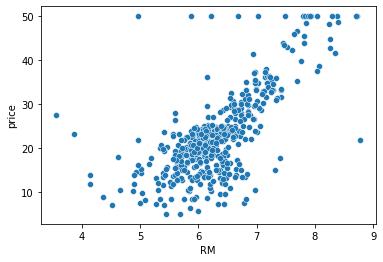

In [17]:
sns.scatterplot(data=df_boston, x="RM",y="price")

Create a heat map to help you identify potentially interesting relationships.

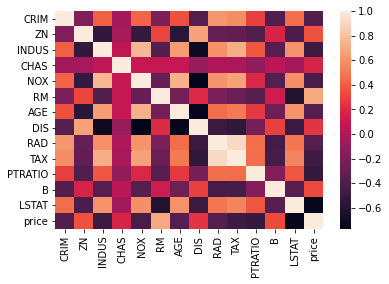

In [18]:
df_boston_corr = df_boston.corr()
sns.heatmap(data=df_boston_corr)

### <font color='lightblue'>Build and train a model </font>

Let's look at building our first model -- linear regression! 
> Can how well can we predict the price of a house based on the proportion of large lots in the area (i.e., the ZN value)?

In [19]:
#1. Build the model
linear_reg_model = smf.ols(formula='price ~ RM', data=df_boston)

#2. Use the data to fit the model (i.e., find the best intercept and slope parameters)
linear_reg_results = linear_reg_model.fit()

#3. make predictions using the model
df_boston['price_pred'] = linear_reg_results.predict(df_boston)

Let's take a look at the predictions!

In [20]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_pred
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,25.339584
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,21.034286
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,28.825691
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,27.169108


Let's plot the predictions

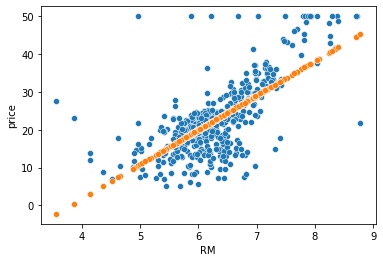

In [21]:
sns.scatterplot(data=df_boston,x='RM', y='price')
sns.scatterplot(data=df_boston,x='RM', y='price_pred')


We can see that all the predicted points fall along a line. This is y = a + b*rooms.
 
Let's take a look at what values for a (intercept) and b (slope RM) the model estimated.

In [22]:
print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           2.49e-74
Time:                        20:28:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Before moving on let's drop the predictions we have made so far.

In [ ]:
df_boston = df_boston.drop('price_pred',axis=1)

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>Training / Testing Split </font>


</br>
</br>
We will follow a general approach when building models. We will divide the dataset into *training* and *testing* datasets. 
</br>
This lets us fit the model to one part of the data and then use the withheld data to test the predictions of the model. This helps us avoid *overfitting* our model!

In [25]:
#load libraries to do the training and testing split
from sklearn.model_selection import train_test_split

#Split the dataframe into 80% training and 20% testing datasets
df_train, df_test = train_test_split(df_boston, test_size=0.20)

In [26]:
#take a look at the shape of the training dataset
df_train.shape

(404, 14)

In [27]:
#take a look at the shape of the testing dataset
df_test.shape


(102, 14)

### <font color='lightblue'>Fit a model </font>

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

In general when using sklearn to fit a model we will follow these steps:

In [29]:
#1. Build the model (define model parameters)
linear_reg_split_model = smf.ols(formula='price ~ RM', data=df_train) #note: using training data

#2. fit the model to the training data
linear_reg_split_results = linear_reg_split_model.fit()

#3. predict values in the training and testing dataset
df_train['price_pred'] = linear_reg_split_results.predict(df_train) #note: using train data
df_test['price_pred'] = linear_reg_split_results.predict(df_test) #note: using test data

#Get a summary of the model parameters
print(linear_reg_split_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     403.5
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.19e-62
Time:                        20:30:48   Log-Likelihood:                -1333.8
No. Observations:                 404   AIC:                             2672.
Df Residuals:                     402   BIC:                             2680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.0893      2.888    -12.150      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Visualize predictions on the training dataset

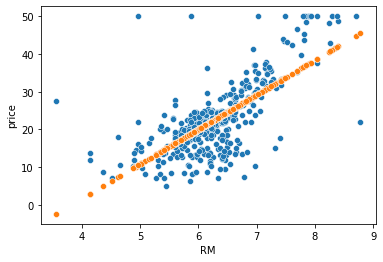

In [30]:
sns.scatterplot(data=df_train,x="RM",y="price") # observed price
sns.scatterplot(data=df_train,x="RM",y="price_pred") #predicted price


Visualize predictions on the testing dataset

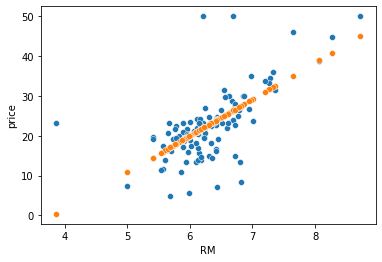

In [31]:
sns.scatterplot(data=df_test,x="RM",y="price") # observed price
sns.scatterplot(data=df_test,x="RM",y="price_pred") # predicted price


How good is the model at predicting?

> Making predictions in the training dataset

In [32]:
#mean squared error
mse_train = sk.metrics.mean_squared_error(df_train['price'], df_train['price_pred']) 

print(" Mean squared error = ", mse_train)

 Mean squared error =  43.17728465971623


> Making predictions in the testing dataset (not used to fit the model)

In [33]:
#mean squared error
mse_test = sk.metrics.mean_squared_error(df_test['price'], df_test['price_pred']) 

print(" Mean squared error = ", mse_test)

 Mean squared error =  45.32643993737139


Q: Which prediction error is higher?

Q: Is all that error just noise? Or could there be other variables that might explain why the predictions are off?

<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>Fit a more complex model</font>

This time we will try multiple linear regression

In [35]:
#1. build the model (define model parameters, and the training data to be used)
multi_linear_reg = smf.ols(formula='price ~ RM + ZN', data=df_train) #use training data

#2. fit the model to the training data
results_RN_ZN = multi_linear_reg.fit() 

#3. Predict values in the testing dataset
df_test['price_pred_RM_ZN'] = results_RN_ZN.predict(df_test) #predict on testing data

#Get a summary of the model parameters
print(results_RN_ZN.summary()) 


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     222.0
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.23e-65
Time:                        20:31:42   Log-Likelihood:                -1323.7
No. Observations:                 404   AIC:                             2653.
Df Residuals:                     401   BIC:                             2665.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.1545      2.949    -10.564      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Visualize and explore these predictions

In [36]:
df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_pred,price_pred_RM_ZN
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4,19.983591,20.823378
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7,16.007839,15.795200
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0,19.689771,20.815335
246,0.33983,22.0,5.86,0,0.431,6.108,34.9,8.0555,7,330,19.1,390.18,9.16,24.3,20.993597,21.816887
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,29.248103,27.960792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6,21.700601,21.025899
124,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188,19.1,379.38,17.58,18.8,18.890948,18.444296
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,27.172999,26.054118
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4,22.104604,21.397109


First let's look at how the model predicts the price of houses in the testing dataset. Now that we have two predictors we'll have to look at one at a time.
</br>
Let's look at the number of rooms (RM) first:

In [38]:
sns.scatterplot(data=df_test,x='RM', y='price')
sns.scatterplot(data=df_test,x='RM', y='price_pred_RM_ZN')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_pred,price_pred_RM_ZN
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4,19.983591,20.823378
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7,16.007839,15.795200
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0,19.689771,20.815335
246,0.33983,22.0,5.86,0,0.431,6.108,34.9,8.0555,7,330,19.1,390.18,9.16,24.3,20.993597,21.816887
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,29.248103,27.960792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6,21.700601,21.025899
124,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188,19.1,379.38,17.58,18.8,18.890948,18.444296
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,27.172999,26.054118
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4,22.104604,21.397109


Then at lot size (ZN):

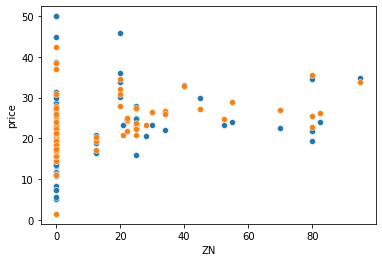

In [39]:
sns.scatterplot(data=df_test,x='ZN', y='price')
sns.scatterplot(data=df_test,x='ZN', y='price_pred_RM_ZN')

How good is the model at predicting?

In [40]:
#mean squared error
mse_multi = sk.metrics.mean_squared_error(df_test['price'], df_test['price_pred_RM_ZN']) 

print(" Mean squared error = ", mse_multi.round(2))



 Mean squared error =  44.18


Q: how does that compare to our simple model?

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

### <font color='lightblue'>Try adding more variables!</font>
 
 Run a linear regression model to predict house prices. Try and beat the RMSE of the previous models! Feel free to post to slack your results and RMSE scores! Does RMSE always decrease as you add more variables?

In [42]:
#1. build the model (define model parameters)
large_linear_reg_large = smf.ols(formula='price ~ RM + ZN + CRIM + INDUS + CHAS + NOX + AGE + DIS + TAX + RAD + PTRATIO + B + LSTAT', data=df_train) #use training data

#2. fit the model to the training data
large_linear_reg_large_res = large_linear_reg_large.fit()

#3. predit with the full model
df_test['price_pred_full'] = large_linear_reg_large_res.predict(df_test) #predict on testing data

#Get a summary of the model parameters
print(large_linear_reg_large_res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.41
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          6.37e-109
Time:                        20:35:29   Log-Likelihood:                -1193.5
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     390   BIC:                             2471.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9883      5.717      6.645      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


How well does it do on the test data?

In [43]:
#mean squared error
mse_full = sk.metrics.mean_squared_error(df_test['price'], df_test['price_pred_full']) 

print(" Mean squared error = ", mse_full)


 Mean squared error =  24.064055709356563


<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

### <font color='lightblue'>Explaining how the model is making predictions</font>

With linear regression we can look to see what features are important when making predictions. We can also see the direction and magnitude of the effect of these features.
> E.g., more rooms in a house are positively associated with house price

Let's take a look at how to make it easier to see which features are important when making predictions.
> To do this we'll ensure that all numeric features are on the same scale (e.g., mean of 0, and standard deviation of 1).

Data wrangling: preprocessing the data

In [44]:
from sklearn.preprocessing import StandardScaler


Data preprocessing should be done after the training testing split

In [45]:
#Split the dataframe into 80% training and 20% testing datasets
df_train, df_test = train_test_split(df_boston, test_size=0.20)

As the preprocessing step can be quite time consuming, We'll use a function called DataFrameMapper to help make it easier. The steps to using this function are:
> 1. Build the transformer
2. Fit the transformer and 
3. Use the transformer to transform the data


In [52]:
#create a copy of your dataframe to transform
df_train_scaled = df_train.copy()

#1. build the preprocessing transformer
scal = StandardScaler()

#2. Fit the DataFrameMapper, and transform the data 
df_train_scaled[:] = scal.fit_transform(df_train_scaled[:])

#take a look
df_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
168,-0.149246,-0.498127,1.273961,-0.283221,0.424089,0.051701,0.958969,-0.799753,-0.503675,-0.019142,-1.699060,-0.641609,-0.220745,0.132991
406,2.105882,-0.498127,1.055664,-0.283221,0.885438,-2.988758,1.096844,-1.230858,1.709382,1.569807,0.799657,0.155826,1.464874,-1.161802
188,-0.415541,1.404383,-1.106653,-0.283221,-1.011217,0.382095,-1.409663,0.353743,-0.503675,-0.049350,-1.471904,0.293439,-1.121394,0.785828
334,-0.426367,-0.498127,-0.848532,-0.283221,-0.344825,0.039155,-1.077348,1.238352,-0.503675,-1.100594,0.799657,0.364971,-0.819800,-0.204308
161,-0.251747,-0.498127,1.273961,-0.283221,0.424089,1.682759,0.771599,-0.860123,-0.503675,-0.019142,-1.699060,0.201733,-1.511124,2.983712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.038900,-0.498127,1.055664,-0.283221,1.833765,-0.043095,0.782205,-0.708332,1.709382,1.569807,0.799657,-0.057572,0.204792,-0.291353
400,2.636105,-0.498127,1.055664,-0.283221,1.175916,-0.411129,1.096844,-1.038804,1.709382,1.569807,0.799657,0.446754,1.937233,-1.847280
318,-0.381714,-0.498127,-0.153818,-0.283221,-0.097064,0.139527,-0.062725,-0.129877,-0.620152,-0.617263,-0.018105,0.428325,-0.322653,0.056827
365,0.126950,-0.498127,1.055664,-0.283221,1.389504,-3.793134,0.669076,-1.027394,1.709382,1.569807,0.799657,-0.013410,-0.768846,0.535574


Q: estimate the mean and standard deviation for one of the new transformed features.

In [53]:
df_train_scaled.RM.mean()

3.669111906490549e-17

In [54]:
df_train.RM.std()

1.0012399260807392

Now run your best model again, this time with the scaled training data.

In [56]:
#1. build the model (define model parameters)
large_linear_reg_large_scaled = smf.ols(formula='price ~ RM + ZN + CRIM + INDUS + CHAS + NOX + AGE + DIS + TAX + RAD + PTRATIO + B + LSTAT', data=df_train_scaled) #use training data

#2. fit the model to the training data
large_linear_reg_large_scaled_res = large_linear_reg_large_scaled.fit()

#3. predit with the full model
df_test['price_pred_full'] = large_linear_reg_large_scaled_res.predict(df_test) #predict on testing data

#Get a summary of the model parameters
print(large_linear_reg_large_scaled_res.summary()) 




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     88.58
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          1.22e-107
Time:                        20:41:01   Log-Likelihood:                -295.62
No. Observations:                 404   AIC:                             619.2
Df Residuals:                     390   BIC:                             675.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.475e-17      0.025   5.79e-16      1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We can now compare the relative effect of each of the features in predicting the price of a house.
> e.g the magnitude and direction of each parameter estimate.
 



# <font color='lightblue'>Further reading</font>

Read more about [using statsmodel](https://www.statsmodels.org/stable/gettingstarted.html) to run regression models.
